In [ ]:
!pip install opencv-python

In [22]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, Activation, Add, Conv2D, BatchNormalization, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adamax
import os

# Define paths to the directories
base_dir = r"C:\Users\dejoe\git\ai_project\phase_3\input\chest_xray_new"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
val_dir = os.path.join(base_dir, "val")
_
# Define ImageDataGenerator instances
data_generator_1 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    brightness_range=[0.95, 1.05],
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest'
)

data_generator_2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    brightness_range=[0.9, 1.1],
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest'
)

data_generator_3 = ImageDataGenerator(rescale=1./255)

# Load data using generators
train_generator_1 = data_generator_1.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

train_generator_2 = data_generator_2.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

train_generator_3 = data_generator_3.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model
from keras.optimizers import Adamax
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate

# Define input shape
img_size = (64, 64)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Number of classes
class_count = len(list(train_generator_1.class_indices.keys()))

# Define grouped convolution block
def grouped_conv_block(x, filters, groups, kernel_size):
    channels_per_group = filters // groups
    groups_list = []

    for i in range(groups):
        group = Conv2D(channels_per_group, kernel_size, padding='same', activation='relu')(x)
        groups_list.append(group)

    return concatenate(groups_list)

# Define the ResNeXt50-like architecture
inputs = Input(shape=img_shape)
x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001))(inputs)
x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001))(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)


x = grouped_conv_block(x, filters=128, groups=32, kernel_size=(3, 3))
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)


x = grouped_conv_block(x, filters=256, groups=32, kernel_size=(3, 3))
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)


x = grouped_conv_block(x, filters=512, groups=32, kernel_size=(3, 3))
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)


x = grouped_conv_block(x, filters=512, groups=32, kernel_size=(3, 3))
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.4)(x)


x = Flatten()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(x)
outputs = Dense(2, activation='softmax')(x)


# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Found 4697 images belonging to 2 classes.
Found 589 images belonging to 2 classes.
Found 586 images belonging to 2 classes.
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_522 (Conv2D)            (None, 64, 64, 64)   1792        ['input_8[0][0]']                
                                                                                                  
 conv2d_523 (Conv2D)            (None, 64, 64, 64)   36928       ['conv2d_522[0][0]']             
                                                                                                  
 max_pooling2d_21 (MaxPooling2D  (None, 32, 32, 64)  0           ['

In [23]:
history = model.fit(
    train_generator_1,
    steps_per_epoch=len(train_generator_1),
    epochs=10,
    validation_data=train_generator_2,
    validation_steps=len(train_generator_2)
)

Epoch 1/10
147/147 [==============================] - 455s 3s/step - loss: 1.0982 - accuracy: 0.7243 - val_loss: 1.0357 - val_accuracy: 0.7284
Epoch 2/10
147/147 [==============================] - 412s 3s/step - loss: 0.8393 - accuracy: 0.7667 - val_loss: 0.6941 - val_accuracy: 0.8557
Epoch 3/10
147/147 [==============================] - 408s 3s/step - loss: 0.6908 - accuracy: 0.8320 - val_loss: 0.7176 - val_accuracy: 0.7810
Epoch 4/10
147/147 [==============================] - 418s 3s/step - loss: 0.5594 - accuracy: 0.8901 - val_loss: 0.5445 - val_accuracy: 0.8913
Epoch 5/10
147/147 [==============================] - 435s 3s/step - loss: 0.4861 - accuracy: 0.9085 - val_loss: 0.4577 - val_accuracy: 0.9083
Epoch 6/10
147/147 [==============================] - 424s 3s/step - loss: 0.4282 - accuracy: 0.9257 - val_loss: 0.4388 - val_accuracy: 0.9338
Epoch 7/10
147/147 [==============================] - 422s 3s/step - loss: 0.4092 - accuracy: 0.9240 - val_loss: 0.4341 - val_accuracy: 0.9219

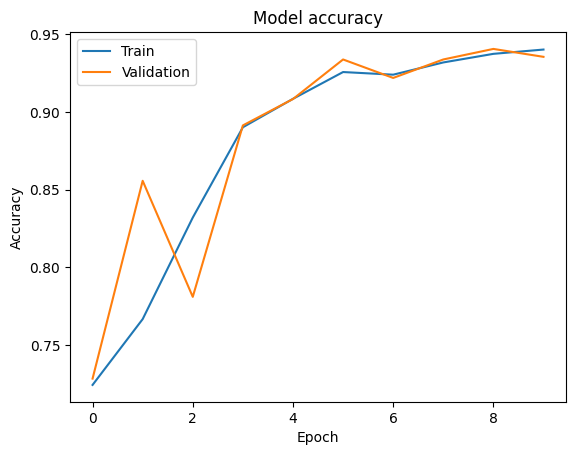

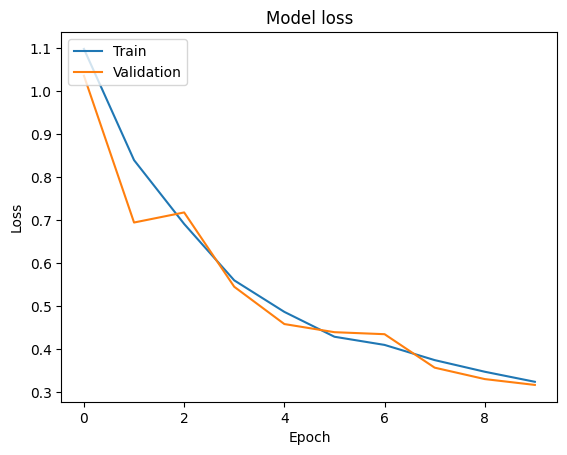

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
test_loss, test_accuracy = model.evaluate(train_generator_2, steps=len(train_generator_2))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

19/19 [==============================] - 10s 510ms/step - loss: 0.3058 - accuracy: 0.9423
Test Loss: 0.30579206347465515
Test Accuracy: 0.9422750473022461


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Generate predictions
predictions = model.predict(train_generator_3)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = train_generator_3.classes

# Generate and print classification report
report = classification_report(true_classes, predicted_classes, target_names=train_generator_3.class_indices)
print("Classification Report:\n", report)

# Generate and plot confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

19/19 [==============================] - 9s 443ms/step
Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.31      0.37      0.34       158
   PNEUMONIA       0.75      0.70      0.72       428

    accuracy                           0.61       586
   macro avg       0.53      0.53      0.53       586
weighted avg       0.63      0.61      0.62       586

Confusion Matrix:
 [[ 59  99]
 [130 298]]


In [28]:
model.save('resnext50.h5')

Prediction on a given image

In [61]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np

loaded_model = load_model('resnext50.h5')

def predict(image_path):
    img = load_img(image_path, target_size=(64, 64))
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = loaded_model.predict(img_array)
    
    # Interpret the prediction
    if prediction[0][0] > prediction[0][1]:
        print("The image is not pneumonia. NORMAL class")
    else:
        print("The image is pneumonia. PNEUMONIA class")

In [62]:
image_path =  r"C:\Users\dejoe\git\ai_project\phase_3\input\chest_xray_new\val\NORMAL\NORMAL-1314288-0001.jpeg"
predict(image_path)

1/1 [==============================] - 1s 1s/step
The image is not pneumonia. NORMAL class


In [63]:
image_path =  r"C:\Users\dejoe\git\ai_project\phase_3\input\chest_xray_new\val\PNEUMONIA\BACTERIA-2386841-0001.jpeg"
predict(image_path)

1/1 [==============================] - 0s 114ms/step
The image is pneumonia. PNEUMONIA class
